<a href="https://colab.research.google.com/github/NguyenVanTrong21130581/ProjectDM/blob/main/ProjectDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Kết nối Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/DoAn'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/DoAn


2. Improt thư viện

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics


3. Đọc file

In [ ]:
# Đọc file Excel
file_path = "adult.xlsx"
data = pd.read_excel(file_path)

print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4. Sơ đồ phân bố dữ liệu

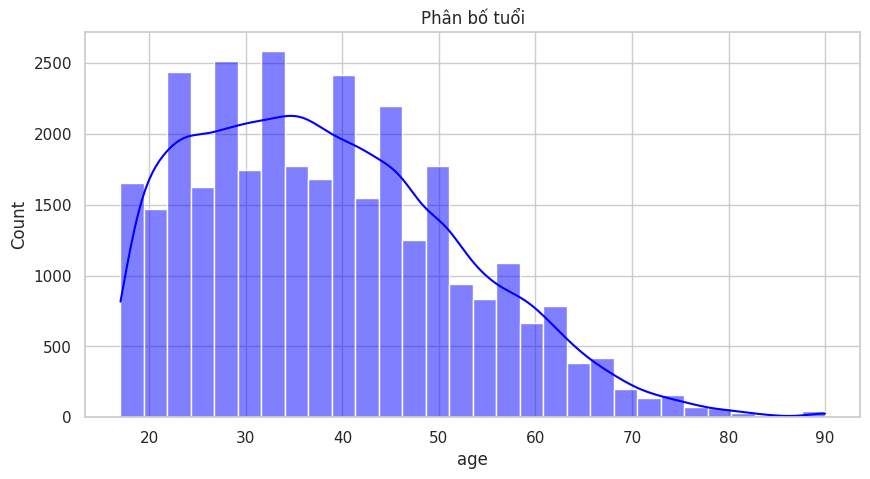

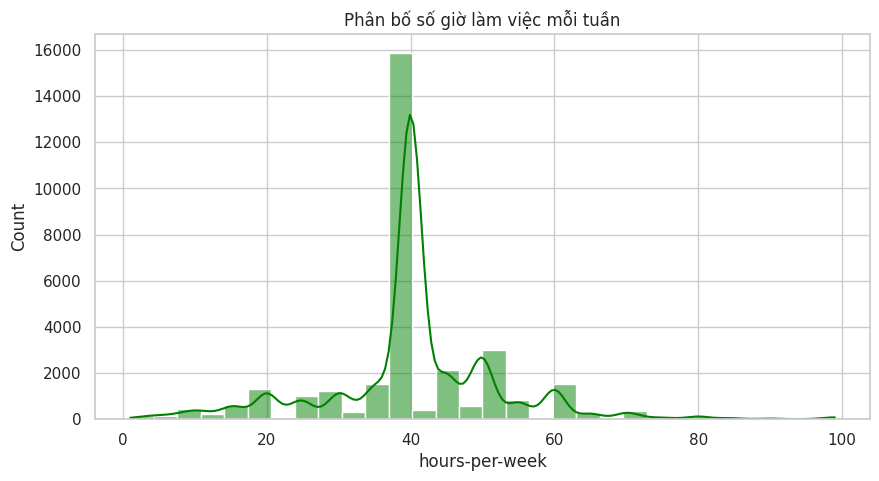

<ipython-input-23-4612859bee5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='income', palette='Set2')


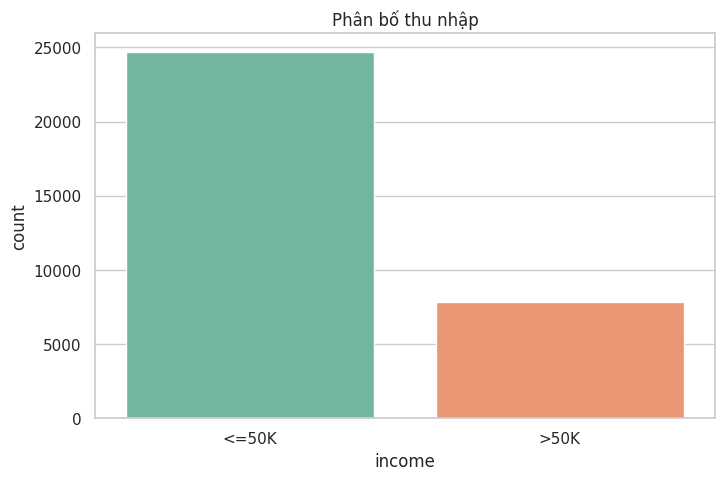

<ipython-input-23-4612859bee5f>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='income', y='age', palette='Set3')


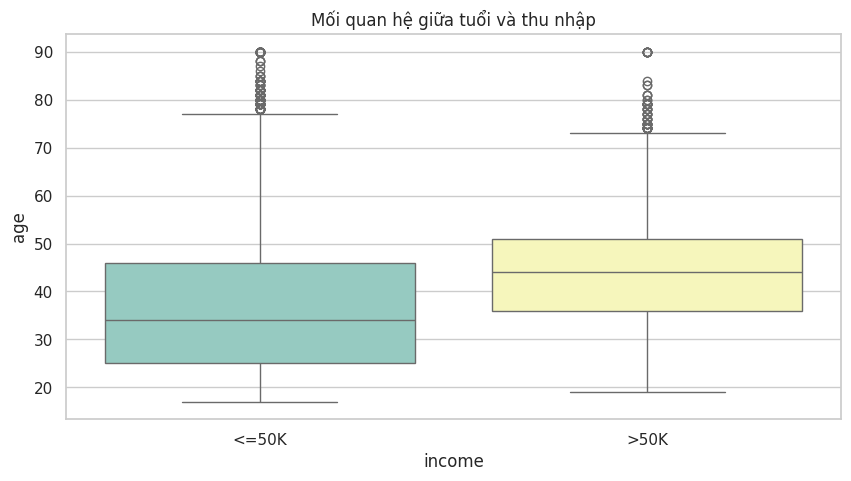

In [ ]:

sns.set(style="whitegrid")

# Phân bố tuổi
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title("Phân bố tuổi")
plt.show()

 # Phân bố giờ làm việc mỗi tuần
plt.figure(figsize=(10, 5))
sns.histplot(data['hours-per-week'], kde=True, bins=30, color='green')
plt.title("Phân bố số giờ làm việc mỗi tuần")
plt.show()

 # Phân bố thu nhập
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='income', palette='Set2')
plt.title("Phân bố thu nhập")
plt.show()

# Mối quan hệ giữa tuổi và thu nhập
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='income', y='age', palette='Set3')
plt.title("Mối quan hệ giữa tuổi và thu nhập")
plt.show()


5. Xử lí Missing data

In [ ]:

data.replace(['?', pd.NA], np.nan, inplace=True)

imputer = SimpleImputer(strategy='most_frequent')

data[['workclass', 'occupation', 'native-country']] = imputer.fit_transform(data[['workclass', 'occupation', 'native-country']])

print(data.info())
print(data[['workclass', 'occupation', 'native-country']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
          workclass         occupation native-country
0         State-gov       Adm-cler

6. Mã hóa imcome

In [ ]:
# Mã hóa cột phân loại
label_enc = LabelEncoder()
data['income'] = label_enc.fit_transform(data['income'])


7. Chuẩn hóa data

In [ ]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']
data = pd.get_dummies(data, columns=categorical_cols)

X = data.drop(columns=['income'])
y = data['income']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


8. Chia train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

9. Run GirdSreachCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tìm kiếm tham số tốt nhất cho Random Forest
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [5, 10, 15, 20]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Parameters (Random Forest):", rf_grid.best_params_)

# Tìm kiếm tham số tốt nhất cho MLP
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate': ['constant']
}
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=3, scoring='accuracy', n_jobs=-1)
mlp_grid.fit(X_train, y_train)

print("Best Parameters (MLP):", mlp_grid.best_params_)

Best Parameters (Random Forest): {'max_depth': 30, 'min_samples_split': 20, 'n_estimators': 200}
Accuracy (Random Forest): 0.869031168432366
Best Parameters (MLP): {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy (MLP): 0.8407799785045295


10. Run RandomForest, Navie Bayes, MLP

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_rf = metrics.f1_score(y_test, y_pred_rf)

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 (Random Forest):", f1_rf)

# Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

accuracy_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
precision_gnb = metrics.precision_score(y_test, y_pred_gnb)
recall_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)

print("Accuracy (Naive Bayes):", accuracy_gnb)
print("Precision (Naive Bayes):", precision_gnb)
print("Recall (Naive Bayes):", recall_gnb)
print("F1 (Naive Bayes):", f1_gnb)

# MLP
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

accuracy_mlp = metrics.accuracy_score(y_test, y_pred_mlp)
precision_mlp = metrics.precision_score(y_test, y_pred_mlp)
recall_mlp = metrics.recall_score(y_test, y_pred_mlp)
f1_mlp = metrics.f1_score(y_test, y_pred_mlp)

print("Accuracy (MLP):", accuracy_mlp)
print("Precision (MLP):", precision_mlp)
print("Recall (MLP):", recall_mlp)
print("F1 (MLP):", f1_mlp)


Accuracy (Random Forest): 0.8644249961615231
Precision (Random Forest): 0.7828947368421053
Recall (Random Forest): 0.6059834500318269
F1 (Random Forest): 0.6831718693936132
Accuracy (Naive Bayes): 0.4082604022723783
Precision (Naive Bayes): 0.2869143177151391
Recall (Naive Bayes): 0.9783577339274347
F1 (Naive Bayes): 0.4437066974595843
Accuracy (MLP): 0.8387839705204975
Precision (MLP): 0.6733200266134398
Recall (MLP): 0.6441756842775302
F1 (MLP): 0.6584255042290176


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


11. Bảng đánh giá mô hình

In [ ]:
from prettytable import PrettyTable
# Lưu kết quả vào bảng
results_table = PrettyTable()
results_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

results_table.add_row(["Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf])
results_table.add_row(["Naive Bayes", accuracy_gnb, precision_gnb, recall_gnb, f1_gnb])
results_table.add_row(["MLP", accuracy_mlp, precision_mlp, recall_mlp, f1_mlp])

print("\nBảng so sánh kết quả:")
print(results_table)


Bảng so sánh kết quả:
+---------------+--------------------+--------------------+--------------------+--------------------+
|     Model     |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------+--------------------+--------------------+--------------------+--------------------+
| Random Forest | 0.8644249961615231 | 0.7828947368421053 | 0.6059834500318269 | 0.6831718693936132 |
|  Naive Bayes  | 0.4082604022723783 | 0.2869143177151391 | 0.9783577339274347 | 0.4437066974595843 |
|      MLP      | 0.8387839705204975 | 0.6733200266134398 | 0.6441756842775302 | 0.6584255042290176 |
+---------------+--------------------+--------------------+--------------------+--------------------+


12. Biểu đồ các giá trị đánh giá mô hình của các thuật toán

<Figure size 1000x600 with 0 Axes>

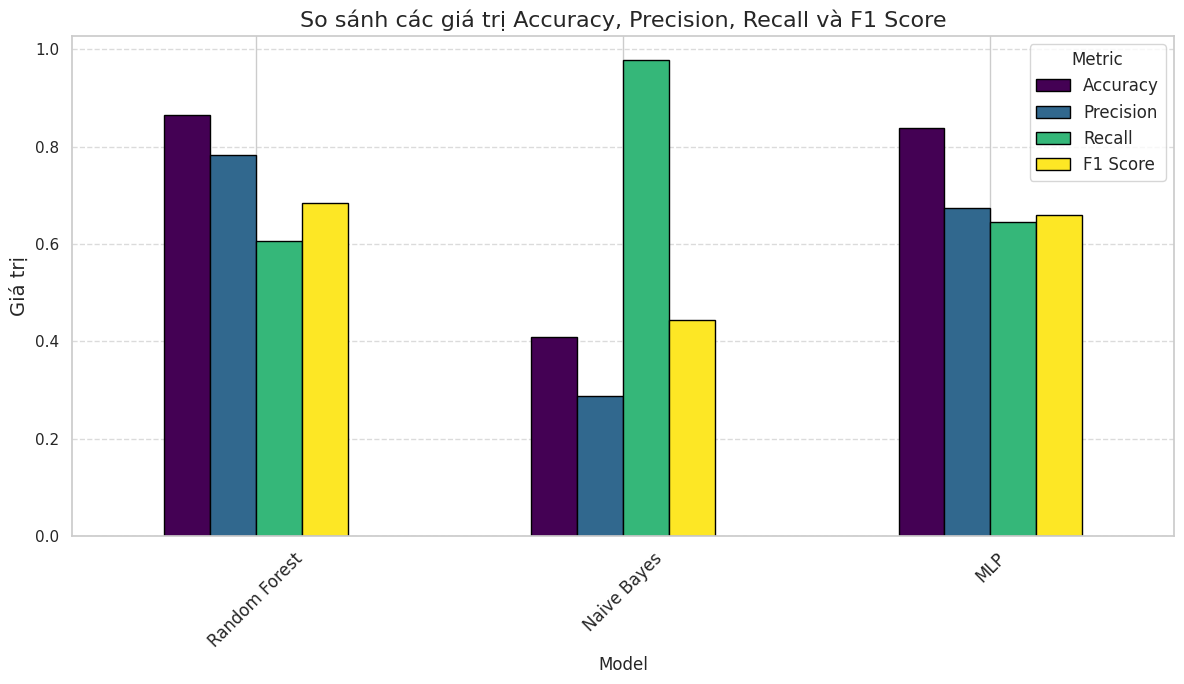

In [ ]:
# Vẽ sơ đồ so sánh các giá trị
metrics_df = pd.DataFrame({
    "Model": ["Random Forest", "Naive Bayes", "MLP"],
    "Accuracy": [accuracy_rf, accuracy_gnb, accuracy_mlp],
    "Precision": [precision_rf, precision_gnb, precision_mlp],
    "Recall": [recall_rf, recall_gnb, recall_mlp],
    "F1 Score": [f1_rf, f1_gnb, f1_mlp]
})

metrics_df.set_index("Model", inplace=True)

plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', figsize=(12, 7), colormap='viridis', edgecolor='black')
plt.title("So sánh các giá trị Accuracy, Precision, Recall và F1 Score", fontsize=16)
plt.ylabel("Giá trị", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
